In [1]:
#libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator as Imgen

from sklearn.metrics import classification_report,confusion_matrix

import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUS:",len(physical_devices))

Num GPUS: 1


In [3]:
classes = ['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Nectarine Flat',
 'Nut Forest',
 'Nut Pecan',
 'Onion Red',
 'Onion Red Peeled',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach 2',
 'Peach Flat',
 'Pear',
 'Pear 2',
 'Pear Abate',
 'Pear Forelle',
 'Pear Kaiser',
 'Pear Monster',
 'Pear Red',
 'Pear Stone',
 'Pear Williams',
 'Pepino',
 'Pepper Green',
 'Pepper Orange',
 'Pepper Red',
 'Pepper Yellow',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Plum 2',
 'Plum 3',
 'Pomegranate',
 'Pomelo Sweetie',
 'Potato Red',
 'Potato Red Washed',
 'Potato Sweet',
 'Potato White',
 'Quince',
 'Rambutan',
 'Raspberry',
 'Redcurrant',
 'Salak',
 'Strawberry',
 'Strawberry Wedge',
 'Tamarillo',
 'Tangelo',
 'Tomato 1',
 'Tomato 2',
 'Tomato 3',
 'Tomato 4',
 'Tomato Cherry Red',
 'Tomato Heart',
 'Tomato Maroon',
 'Tomato Yellow',
 'Tomato not Ripened',
 'Walnut',
 'Watermelon']

**Getting the Dta**

In [27]:
train_datagen = Imgen(preprocessing_function=keras.applications.xception.preprocess_input,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

test_datagen = Imgen(preprocessing_function=keras.applications.xception.preprocess_input)

- One batch

In [29]:
x_train,y_train = next(train_ds)

- Classes

In [30]:
pred_class = train_ds.class_indices
pred_class = list(pred_class.keys())
len(pred_class)

131

**Visualizing Some**

In [31]:
#plot function
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(pred_class[np.argmax(labels[i])])
        plt.axis('off')

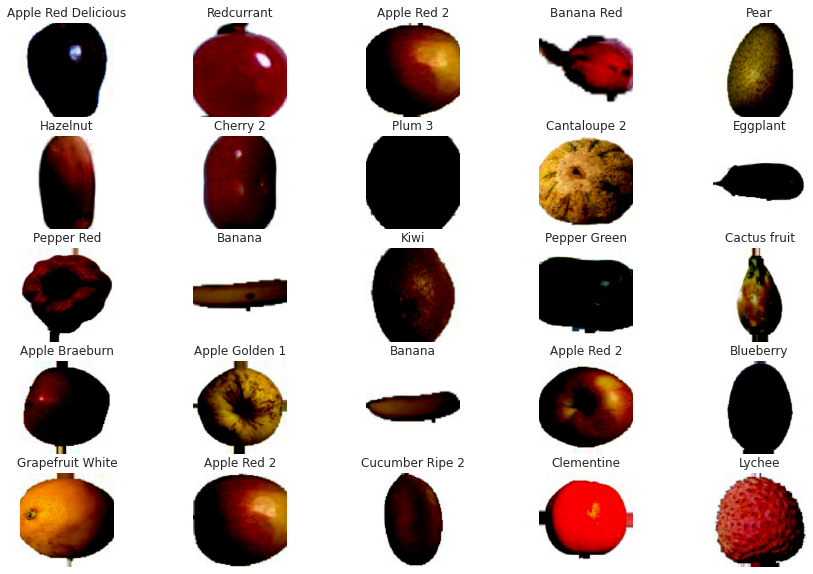

In [32]:
plot_images(x_train,y_train)

## **Model**

In [33]:
from keras.applications.xception import Xception

In [34]:
base_model = Xception(include_top=False,
                        weights='imagenet',
                        input_shape=(224,224,3)
                        )
base_model.trainable = False

In [35]:
#model

model = keras.models.Sequential([
    
    base_model,
    
    GlobalAveragePooling2D(),
    
    Dense(len(pred_class),activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 131)               268419    
Total params: 21,129,899
Trainable params: 268,419
Non-trainable params: 20,861,480
_________________________________________________________________


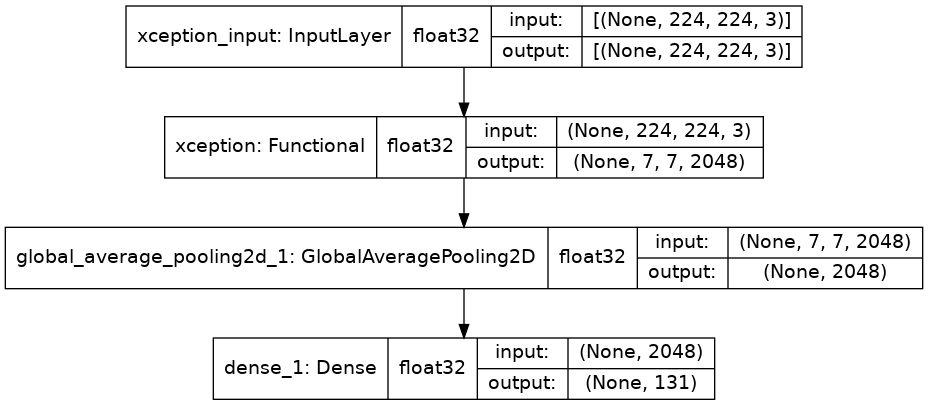

In [37]:
keras.utils.plot_model(model,
                      show_shapes=True,
                      show_dtype=True,
                      show_layer_names=True)

In [38]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
my_calls = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2),
            keras.callbacks.ModelCheckpoint("Model_VGG.h5",verbose=1,save_best_only=True)]

**Train**

In [40]:
hist  = model.fit(train_ds,epochs=7,validation_data=val_ds,callbacks=my_calls)

Epoch 1/7
1694/1694 [==============================] - 1336s 787ms/step - loss: 2.9057 - accuracy: 0.5306 - val_loss: 0.8113 - val_accuracy: 0.9179

Epoch 00001: val_loss improved from inf to 0.81130, saving model to Model_VGG.h5
Epoch 2/7
1694/1694 [==============================] - 879s 519ms/step - loss: 0.5781 - accuracy: 0.9531 - val_loss: 0.4175 - val_accuracy: 0.9493

Epoch 00002: val_loss improved from 0.81130 to 0.41752, saving model to Model_VGG.h5
Epoch 3/7
1694/1694 [==============================] - 921s 544ms/step - loss: 0.2865 - accuracy: 0.9789 - val_loss: 0.2758 - val_accuracy: 0.9612

Epoch 00003: val_loss improved from 0.41752 to 0.27580, saving model to Model_VGG.h5
Epoch 4/7
1694/1694 [==============================] - 875s 517ms/step - loss: 0.1682 - accuracy: 0.9898 - val_loss: 0.2067 - val_accuracy: 0.9674

Epoch 00004: val_loss improved from 0.27580 to 0.20670, saving model to Model_VGG.h5
Epoch 5/7
1694/1694 [==============================] - 906s 535ms/step 

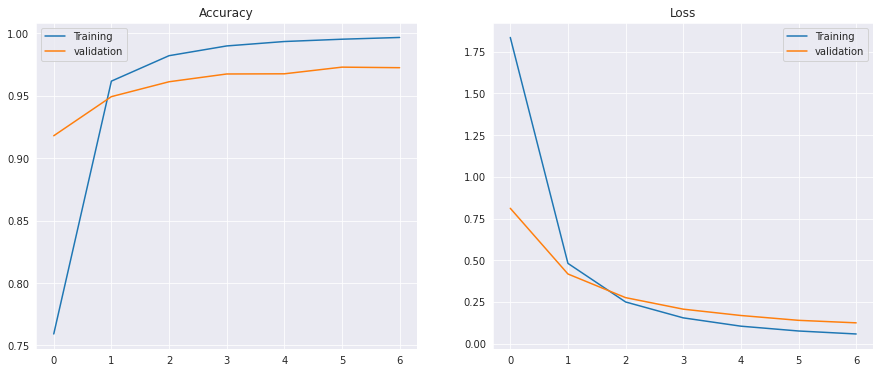

In [41]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Predictions**

In [42]:
preds = model.predict(test_ds,verbose=1)

709/709 [==============================] - 227s 319ms/step


In [43]:
test_ds.classes

array([  0,   0,   0, ..., 130, 130, 130], dtype=int32)

In [44]:
preds = [np.argmax(i) for i in preds]

In [45]:
pd.DataFrame(preds).value_counts()

104    359
44     328
86     292
122    281
95     280
      ... 
36     112
1      111
87     102
79     101
42     100
Length: 131, dtype: int64

In [46]:
pred_class[6]

'Apple Pink Lady'

In [47]:
classification_report(test_ds.classes,preds)

'              precision    recall  f1-score   support\n\n           0       0.79      1.00      0.88       164\n           1       0.95      0.72      0.82       148\n           2       1.00      1.00      1.00       160\n           3       0.88      0.96      0.92       164\n           4       0.92      0.95      0.94       161\n           5       0.92      0.99      0.96       164\n           6       0.62      1.00      0.77       152\n           7       0.91      0.80      0.85       164\n           8       0.89      0.70      0.78       164\n           9       0.96      0.85      0.90       144\n          10       0.99      1.00      1.00       166\n          11       0.91      0.97      0.94       164\n          12       1.00      1.00      1.00       219\n          13       0.99      0.99      0.99       164\n          14       0.99      0.99      0.99       143\n          15       1.00      1.00      1.00       166\n          16       1.00      0.98      0.99       166\n       

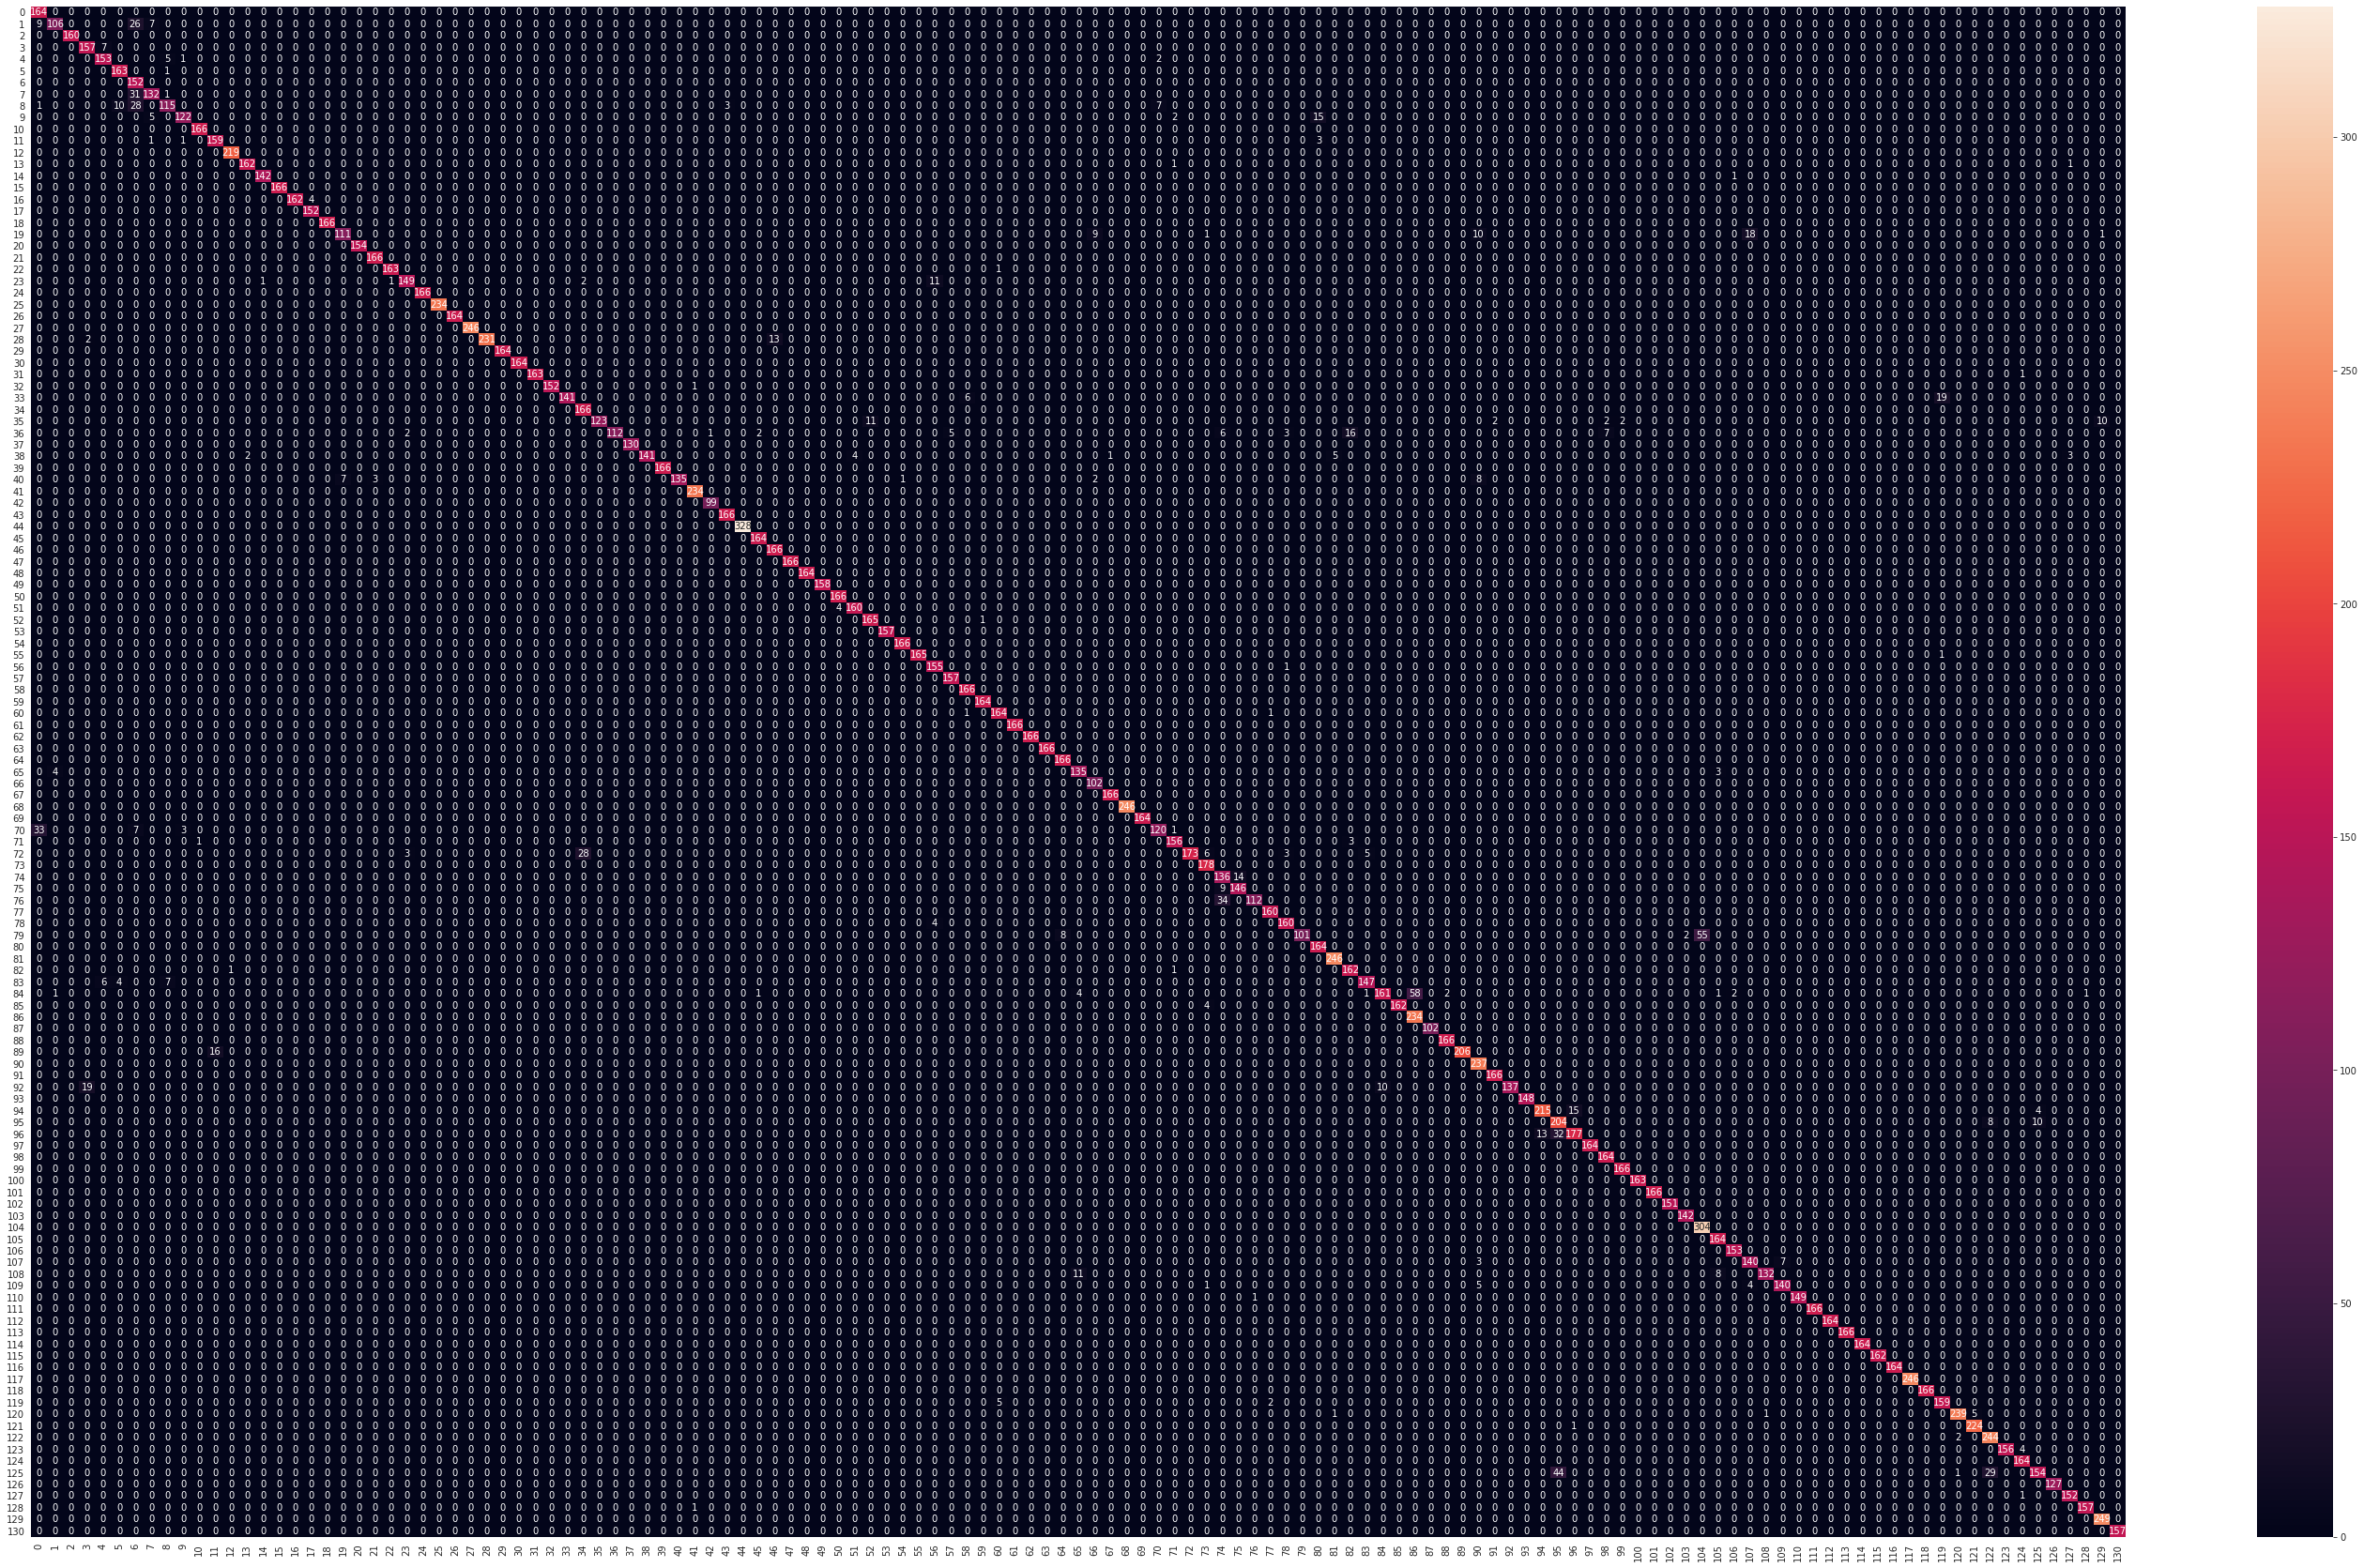

In [48]:
plt.figure(figsize=(50,30))
sns.heatmap(confusion_matrix(test_ds.classes,preds),annot=True,fmt='d');

In [49]:
test_img,labels = next(test_ds)

In [50]:
#plot function
def test_images(images_arr,labels):
    plt.figure(figsize=(25,12))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images_arr[i])
        plt.xlabel("Actual: {}".format(pred_class[np.argmax(labels[i])]))
        plt.ylabel("Predicted: {}".format(pred_class[preds[i]]))

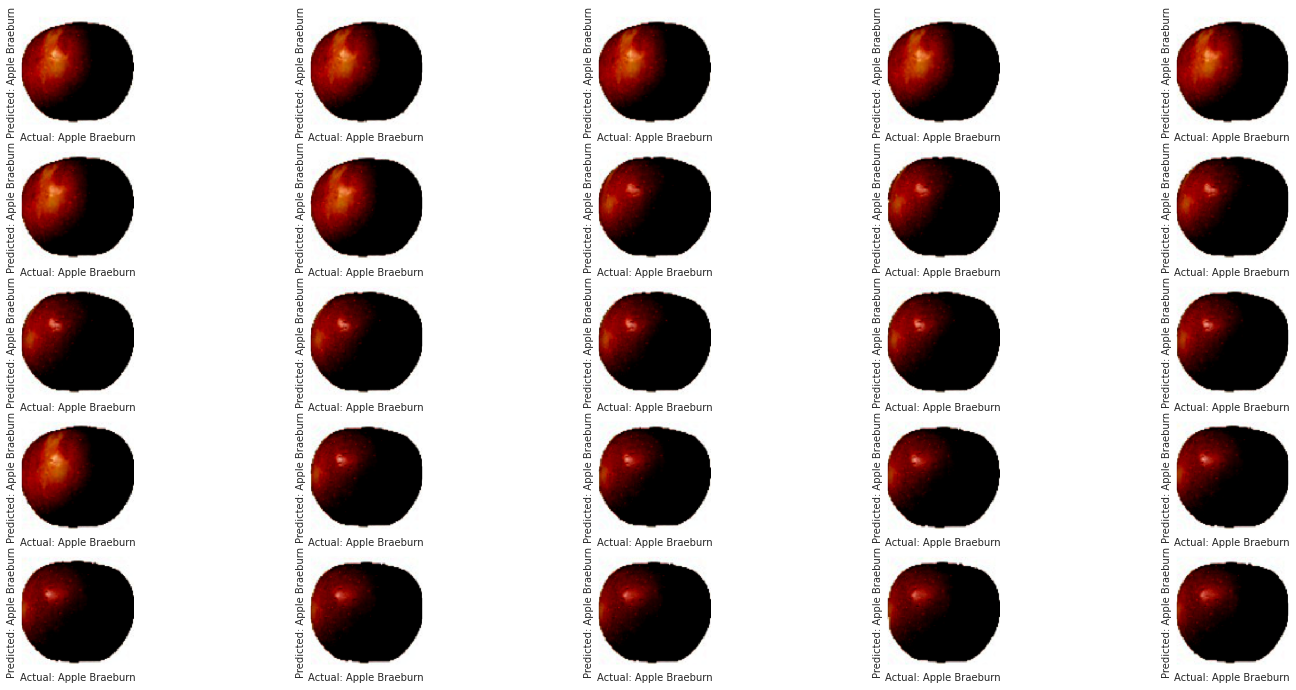

In [51]:
test_images(test_img,labels)

****Prediction data****

In [52]:
from PIL import Image
from keras.preprocessing import image

In [53]:
#preprocess file
def prepare_img(path):
    img = image.load_img(path,target_size=(224,224))
    img_arr = image.img_to_array(img)
    img_arr_expnd  = np.expand_dims(img_arr,axis=0)
    img = keras.applications.mobilenet_v2.preprocess_input(img_arr_expnd)
    
    return img

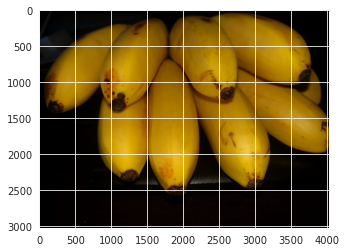

In [54]:
plt.imshow(Image.open('../input/fruits/fruits-360/test-multiple_fruits/Bananas(lady_finger)3.jpg'));


In [55]:
prep_img1 = prepare_img('../input/fruits/fruits-360/test-multiple_fruits/Bananas(lady_finger)3.jpg')
prep_img1.shape

(1, 224, 224, 3)

In [56]:
pred1 = model.predict(prep_img1)

In [57]:
pred_class[np.argmax(pred1)]

'Banana Lady Finger'